In [1]:
import pandas as pd

In [2]:
water_quality_df = pd.read_csv('water.quality.csv' ,encoding = 'latin-1')

In [3]:
water_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139566 entries, 0 to 139565
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  139566 non-null  int64  
 1   Time        139566 non-null  object 
 2   Tp          138522 non-null  float64
 3   Cl          138521 non-null  float64
 4   pH          138522 non-null  float64
 5   Redox       138522 non-null  float64
 6   Leit        138522 non-null  float64
 7   Trueb       138522 non-null  float64
 8   Cl_2        138522 non-null  float64
 9   Fm          138522 non-null  float64
 10  Fm_2        138522 non-null  float64
 11  EVENT       139566 non-null  bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 11.8+ MB


In [4]:
water_quality_df.Time = pd.to_datetime(water_quality_df.Time)

In [5]:
wqt= water_quality_df.Time.dt.time
wqt

0         11:49:00
1         11:50:00
2         11:51:00
3         11:52:00
4         11:53:00
            ...   
139561    08:50:00
139562    08:51:00
139563    08:52:00
139564    08:53:00
139565    08:54:00
Name: Time, Length: 139566, dtype: object

In [6]:
wqd = water_quality_df.Time.dt.date
wqd

0         2016-08-03
1         2016-08-03
2         2016-08-03
3         2016-08-03
4         2016-08-03
             ...    
139561    2016-11-08
139562    2016-11-08
139563    2016-11-08
139564    2016-11-08
139565    2016-11-08
Name: Time, Length: 139566, dtype: object

In [7]:
day_of_week = water_quality_df.Time.dt.day_name()

In [8]:
months = water_quality_df.Time.dt.month_name()

In [9]:
water_quality_df['wqd']=wqd
water_quality_df.wqd= pd.to_datetime(water_quality_df.wqd)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
water_quality_df['day_of_week']=day_of_week
water_quality_df['day_of_week']=pd.Categorical(water_quality_df['day_of_week'], categories=days_order, ordered=True)
months_order = ['August', 'September', 'October', 'November']
water_quality_df['months']=months
water_quality_df['months']=pd.Categorical(water_quality_df['months'], categories=months_order, ordered=True)
water_quality_df['wqt']=wqt

In [10]:
water_quality_df['hour']=water_quality_df.Time.dt.hour

In [11]:
def get_day_period(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 15:
        return 'Noon'
    elif 15 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Night'
periods_order = ['Morning', 'Noon', 'Afternoon', 'Night']
water_quality_df['period'] = water_quality_df['hour'].apply(get_day_period)
water_quality_df['period']=pd.Categorical(water_quality_df['period'], categories=periods_order, ordered=True)

In [12]:
water_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139566 entries, 0 to 139565
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Unnamed: 0   139566 non-null  int64         
 1   Time         139566 non-null  datetime64[ns]
 2   Tp           138522 non-null  float64       
 3   Cl           138521 non-null  float64       
 4   pH           138522 non-null  float64       
 5   Redox        138522 non-null  float64       
 6   Leit         138522 non-null  float64       
 7   Trueb        138522 non-null  float64       
 8   Cl_2         138522 non-null  float64       
 9   Fm           138522 non-null  float64       
 10  Fm_2         138522 non-null  float64       
 11  EVENT        139566 non-null  bool          
 12  wqd          139566 non-null  datetime64[ns]
 13  day_of_week  139566 non-null  category      
 14  months       139566 non-null  category      
 15  wqt          139566 non-null  obje

In [13]:
water_quality_df.head()

,Unnamed: 0,Time,Tp,Cl,pH,Redox,Leit,Trueb,Cl_2,Fm,Fm_2,EVENT,wqd,day_of_week,months,wqt,hour,period
0,1,2016-08-03 11:49:00,6.5,0.17,8.36,749.0,211.0,0.011,0.118,1677.0,695.0,False,2016-08-03,Wednesday,August,11:49:00,11,Morning
1,2,2016-08-03 11:50:00,6.5,0.17,8.36,749.0,211.0,0.011,0.118,1561.0,696.0,False,2016-08-03,Wednesday,August,11:50:00,11,Morning
2,3,2016-08-03 11:51:00,6.5,0.17,8.35,749.0,211.0,0.011,0.117,1581.0,696.0,False,2016-08-03,Wednesday,August,11:51:00,11,Morning
3,4,2016-08-03 11:52:00,6.5,0.17,8.35,749.0,211.0,0.011,0.118,1579.0,693.0,False,2016-08-03,Wednesday,August,11:52:00,11,Morning
4,5,2016-08-03 11:53:00,6.5,0.17,8.35,749.0,211.0,0.011,0.118,1567.0,689.0,False,2016-08-03,Wednesday,August,11:53:00,11,Morning


In [14]:
water_quality_df.isna().sum()

Unnamed: 0        0
Time              0
Tp             1044
Cl             1045
pH             1044
Redox          1044
Leit           1044
Trueb          1044
Cl_2           1044
Fm             1044
Fm_2           1044
EVENT             0
wqd               0
day_of_week       0
months            0
wqt               0
hour              0
period            0
dtype: int64

In [15]:
cleaned_water_quality_df=water_quality_df.dropna()
cleaned_water_quality_df

,Unnamed: 0,Time,Tp,Cl,pH,Redox,Leit,Trueb,Cl_2,Fm,Fm_2,EVENT,wqd,day_of_week,months,wqt,hour,period
0,1,2016-08-03 11:49:00,6.5,0.17,8.36,749.0,211.0,0.011,0.118,1677.0,695.0,False,2016-08-03,Wednesday,August,11:49:00,11,Morning
1,2,2016-08-03 11:50:00,6.5,0.17,8.36,749.0,211.0,0.011,0.118,1561.0,696.0,False,2016-08-03,Wednesday,August,11:50:00,11,Morning
2,3,2016-08-03 11:51:00,6.5,0.17,8.35,749.0,211.0,0.011,0.117,1581.0,696.0,False,2016-08-03,Wednesday,August,11:51:00,11,Morning
3,4,2016-08-03 11:52:00,6.5,0.17,8.35,749.0,211.0,0.011,0.118,1579.0,693.0,False,2016-08-03,Wednesday,August,11:52:00,11,Morning
4,5,2016-08-03 11:53:00,6.5,0.17,8.35,749.0,211.0,0.011,0.118,1567.0,689.0,False,2016-08-03,Wednesday,August,11:53:00,11,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139561,139562,2016-11-08 08:50:00,10.1,0.16,8.41,762.0,189.0,0.023,0.105,1799.0,924.0,False,2016-11-08,Tuesday,November,08:50:00,8,Morning
139562,139563,2016-11-08 08:51:00,10.1,0.17,8.41,762.0,190.0,0.022,0.106,1835.0,927.0,False,2016-11-08,Tuesday,November,08:51:00,8,Morning
139563,139564,2016-11-08 08:52:00,10.1,0.17,8.41,762.0,190.0,0.022,0.106,1807.0,924.0,False,2016-11-08,Tuesday,November,08:52:00,8,Morning
139564,139565,2016-11-08 08:53:00,10.1,0.17,8.41,762.0,190.0,0.022,0.106,1799.0,930.0,False,2016-11-08,Tuesday,November,08:53:00,8,Morning


In [16]:
cleaned_water_quality_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138521 entries, 0 to 139565
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Unnamed: 0   138521 non-null  int64         
 1   Time         138521 non-null  datetime64[ns]
 2   Tp           138521 non-null  float64       
 3   Cl           138521 non-null  float64       
 4   pH           138521 non-null  float64       
 5   Redox        138521 non-null  float64       
 6   Leit         138521 non-null  float64       
 7   Trueb        138521 non-null  float64       
 8   Cl_2         138521 non-null  float64       
 9   Fm           138521 non-null  float64       
 10  Fm_2         138521 non-null  float64       
 11  EVENT        138521 non-null  bool          
 12  wqd          138521 non-null  datetime64[ns]
 13  day_of_week  138521 non-null  category      
 14  months       138521 non-null  category      
 15  wqt          138521 non-null  object   

In [17]:
cleaned_water_quality_df.describe()

,Unnamed: 0,Time,Tp,Cl,pH,Redox,Leit,Trueb,Cl_2,Fm,Fm_2,wqd,hour
count,138521.000000,138521,138521.000000,138521.000000,138521.000000,138521.000000,138521.000000,138521.000000,138521.000000,138521.000000,138521.000000,138521,138521.000000
mean,69987.592668,2016-09-21 02:09:48.868979712,8.521414,0.165482,8.366415,752.899023,209.520966,0.019778,0.106099,1534.209326,927.728655,2016-09-20 14:11:33.642119424,11.479162
min,1.000000,2016-08-03 11:49:00,0.000000,0.000000,4.000000,300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2016-08-03 00:00:00,0.000000
25%,34631.000000,2016-08-27 12:59:00,7.500000,0.160000,8.340000,751.000000,209.000000,0.016000,0.103000,1388.000000,847.000000,2016-08-27 00:00:00,5.000000
50%,70246.000000,2016-09-21 06:34:00,8.400000,0.170000,8.370000,754.000000,211.000000,0.018000,0.106000,1512.000000,925.000000,2016-09-21 00:00:00,11.000000
75%,104876.000000,2016-10-15 07:44:00,9.500000,0.170000,8.390000,756.000000,211.000000,0.023000,0.110000,1650.000000,1000.000000,2016-10-15 00:00:00,17.000000
max,139566.000000,2016-11-08 08:54:00,11.800000,0.800000,8.936228,895.000000,646.000000,0.254000,0.462000,3923.000000,2592.000000,2016-11-08 00:00:00,23.000000
std,40332.549554,NaN,1.281315,0.010207,0.101625,12.945330,7.747515,0.005492,0.007132,208.171700,147.447770,NaN,6.933962


In [18]:
cols_to_see = ['Tp', 'Cl', 'pH', 'Redox', 'Leit', 'Trueb', 'Cl_2', 'Fm', 'Fm_2']
cleaned_water_quality_df.groupby('EVENT')[cols_to_see].mean()

,Tp,Cl,pH,Redox,Leit,Trueb,Cl_2,Fm,Fm_2
EVENT,,,,,,,,,
False,8.523563,0.165573,8.368697,753.509463,209.485200,0.019751,0.106254,1535.509814,928.687503
True,8.351101,0.158272,8.185567,704.518260,212.355588,0.021905,0.093770,1431.138470,851.734647


In [19]:
cols_to_see = ['Tp', 'Cl', 'pH', 'Redox', 'Leit', 'Trueb', 'Cl_2', 'Fm', 'Fm_2']
cleaned_water_quality_df.groupby('day_of_week')[cols_to_see].mean()

C:\Users\Zahraa\AppData\Local\Temp\ipykernel_28552\1606025311.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cleaned_water_quality_df.groupby('day_of_week')[cols_to_see].mean()


,Tp,Cl,pH,Redox,Leit,Trueb,Cl_2,Fm,Fm_2
day_of_week,,,,,,,,,
Monday,8.642110,0.165163,8.370875,753.933079,208.899236,0.019382,0.105706,1554.709324,879.469806
Tuesday,8.557427,0.165504,8.371452,753.413934,209.913401,0.019505,0.105689,1554.465410,926.739742
Wednesday,8.462979,0.164460,8.360645,751.804103,210.291039,0.020377,0.105650,1578.737083,920.433551
Thursday,8.426275,0.165286,8.358128,750.347085,209.809425,0.019866,0.105790,1588.143700,977.660119
Friday,8.472217,0.165968,8.367934,753.566152,209.125298,0.019938,0.106823,1558.587202,959.308829
Saturday,8.530794,0.166236,8.367560,753.703453,208.957850,0.019602,0.106718,1461.488194,936.992212
Sunday,8.563552,0.165706,8.368555,753.560458,209.664887,0.019767,0.106263,1446.811260,890.839831


In [20]:
cols_to_see = ['Tp', 'Cl', 'pH', 'Redox', 'Leit', 'Trueb', 'Cl_2', 'Fm', 'Fm_2']
cleaned_water_quality_df.groupby('months')[cols_to_see].mean()

C:\Users\Zahraa\AppData\Local\Temp\ipykernel_28552\4020823798.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cleaned_water_quality_df.groupby('months')[cols_to_see].mean()


,Tp,Cl,pH,Redox,Leit,Trueb,Cl_2,Fm,Fm_2
months,,,,,,,,,
August,7.048133,0.165194,8.344086,751.967630,210.465083,0.021781,0.110155,1634.102706,941.702166
September,8.190472,0.166041,8.364810,752.786330,210.910689,0.021328,0.106922,1588.814653,939.988935
October,9.659218,0.165427,8.379791,753.619825,210.807661,0.016401,0.102099,1411.159117,906.592249
November,10.644220,0.164527,8.400981,753.841922,194.890626,0.020110,0.104259,1452.408384,913.976637


In [21]:
cols_to_see = ['Tp', 'Cl', 'pH', 'Redox', 'Leit', 'Trueb', 'Cl_2', 'Fm', 'Fm_2']
cleaned_water_quality_df.groupby(['months','day_of_week'])[cols_to_see].mean()

C:\Users\Zahraa\AppData\Local\Temp\ipykernel_28552\2813459010.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cleaned_water_quality_df.groupby(['months','day_of_week'])[cols_to_see].mean()


Tp        Cl        pH       Redox        Leit  \
months    day_of_week                                                          
August    Monday        7.026508  0.164826  8.342178  751.826157  211.063652   
          Tuesday       7.153204  0.165082  8.351052  751.441897  210.699601   
          Wednesday     7.108658  0.165052  8.344680  752.006103  210.002465   
          Thursday      6.928872  0.165191  8.345137  751.902604  210.078993   
          Friday        6.974583  0.164589  8.341095  752.234722  210.171701   
          Saturday      7.046719  0.165917  8.343040  752.264236  210.356771   
          Sunday        7.087031  0.165656  8.341022  752.068547  211.043403   
September Monday        8.169670  0.165995  8.374016  754.779167  210.394574   
          Tuesday       8.221372  0.166106  8.370952  754.942014  211.256532   
          Wednesday     8.273108  0.163839  8.344372  749.946354  210.782465   
          Thursday      8.190139  0.166053  8.350825  748.411699  210.535139   
          Friday        8.222514  0.166590  8.370157  754.141891  210.707222   
          Saturday      8.110972  0.167061  8.371261  753.867294  211.458724   
          Sunday        8.137604  0.166502  8.374243  754.170660  211.384917   
October   Monday        9.765597  0.164876  8.381850  753.424722  210.088194   
          Tuesday       9.571076  0.165351  8.380837  754.120660  211.308681   
          Wednesday     9.572309  0.164184  8.380844  753.646007  212.107465   
          Thursday      9.615868  0.165444  8.380535  753.788021  210.914062   
          Friday        9.723420  0.166163  8.379559  753.673785  210.597569   
          Saturday      9.626917  0.166443  8.377010  753.715556  209.776667   
          Sunday        9.708500  0.165412  8.378426  753.119861  211.200417   
November  Monday       10.272847  0.164389  8.398618  760.078472  189.794444   
          Tuesday      10.675899  0.165428  8.405023  752.646582  199.634430   
          Wednesday    10.889931  0.165382  8.416903  750.956944  202.360417   
          Thursday     10.838194  0.161201  8.356979  740.038194  200.684028   
          Friday       10.706458  0.167590  8.417674  755.582639  191.140972   
          Saturday     10.665764  0.163174  8.403590  758.744444  189.264583   
          Sunday       10.448681  0.164188  8.406576  759.290278  189.593056   

                          Trueb      Cl_2           Fm         Fm_2  
months    day_of_week                                                
August    Monday       0.020211  0.110014  1639.121231   902.181323  
          Tuesday      0.023309  0.109135  1660.833825   870.059212  
          Wednesday    0.023453  0.110576  1701.443845   930.034509  
          Thursday     0.020485  0.110089  1690.636632   973.415451  
          Friday       0.021551  0.110019  1642.700347   997.148958  
          Saturday     0.021722  0.110621  1556.053299   980.946528  
          Sunday       0.021257  0.110554  1540.245486   932.846007  
September Monday       0.021781  0.107216  1632.604687   869.661806  
          Tuesday      0.019640  0.106848  1613.382639   962.060764  
          Wednesday    0.021487  0.104520  1654.152431   908.487847  
          Thursday     0.022214  0.106432  1640.449167  1040.085000  
          Friday       0.021493  0.107715  1612.410139   953.909722  
          Saturday     0.020925  0.107937  1463.029514   936.725521  
          Sunday       0.021497  0.107712  1486.866493   880.487674  
October   Monday       0.016635  0.101615  1447.702778   864.426111  
          Tuesday      0.015982  0.102529  1427.292535   938.254167  
          Wednesday    0.016083  0.101567  1415.873090   923.438889  
          Thursday     0.016267  0.102442  1442.744618   911.906076  
          Friday       0.016222  0.102357  1433.855556   945.969965  
          Saturday     0.016447  0.102689  1374.580139   911.525833  
          Sunday       0.016960  0.101593  1351.090972   869.264722  
November  Monday   

<Axes: xlabel='wqd'>

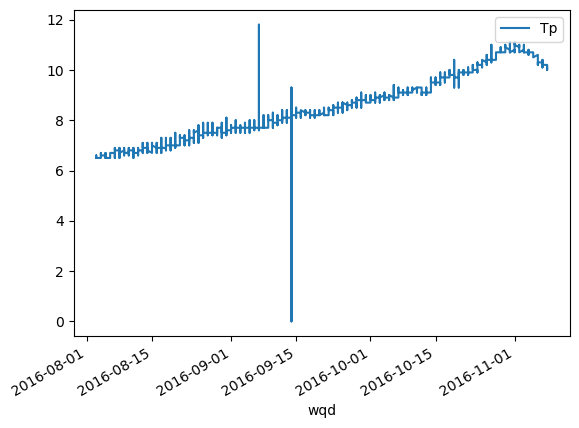

In [154]:
cleaned_water_quality_df.plot('wqd','Tp')

KeyError: "None of ['day_of_week'] are in the columns"

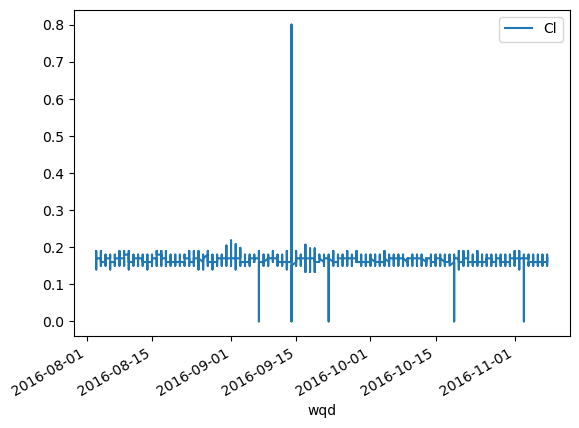

In [186]:
cleaned_water_quality_df.plot('wqd','Cl')


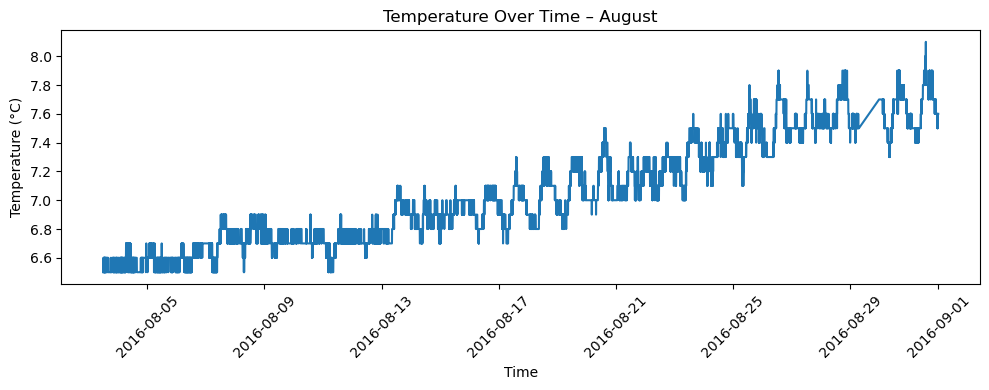

<Figure size 640x480 with 0 Axes>

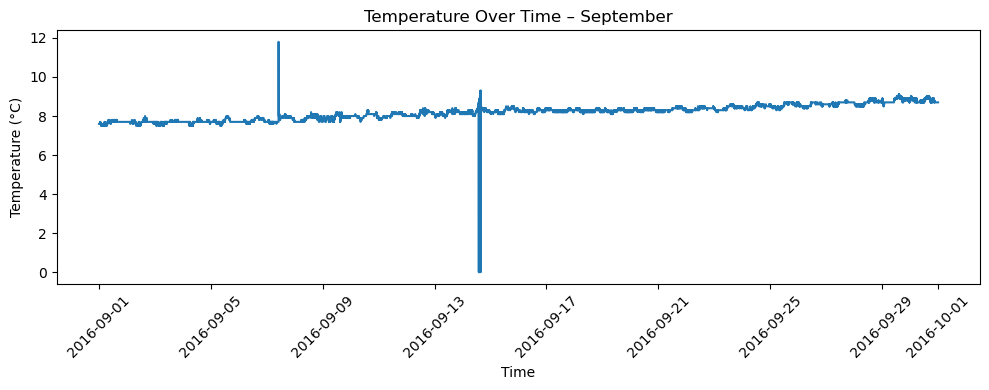

<Figure size 640x480 with 0 Axes>

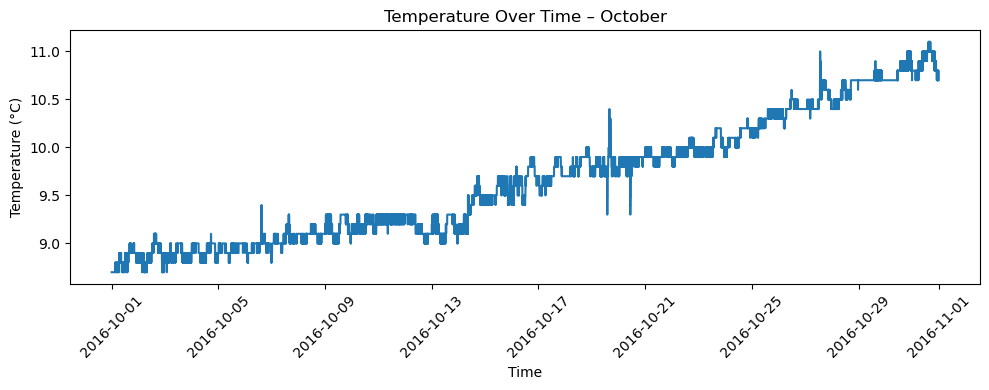

<Figure size 640x480 with 0 Axes>

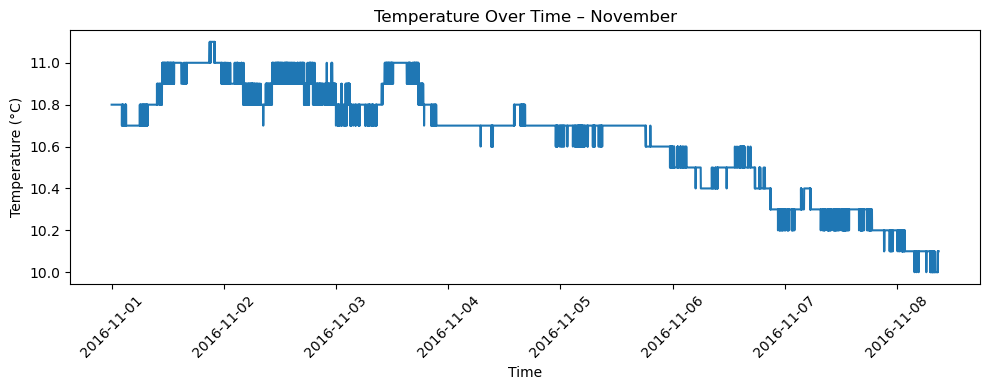

<Figure size 640x480 with 0 Axes>

In [191]:
import matplotlib.pyplot as plt

months = cleaned_water_quality_df['months'].unique()

for month in months:
    subset = cleaned_water_quality_df[cleaned_water_quality_df['months'] == month]
    plt.figure(figsize=(10, 4))
    plt.plot(subset['Time'], subset['Tp'])
    plt.title(f'Temperature Over Time – {month}')
    plt.xlabel('Time')
    plt.ylabel('Temperature (°C)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    plt.savefig("Temp_over_time")

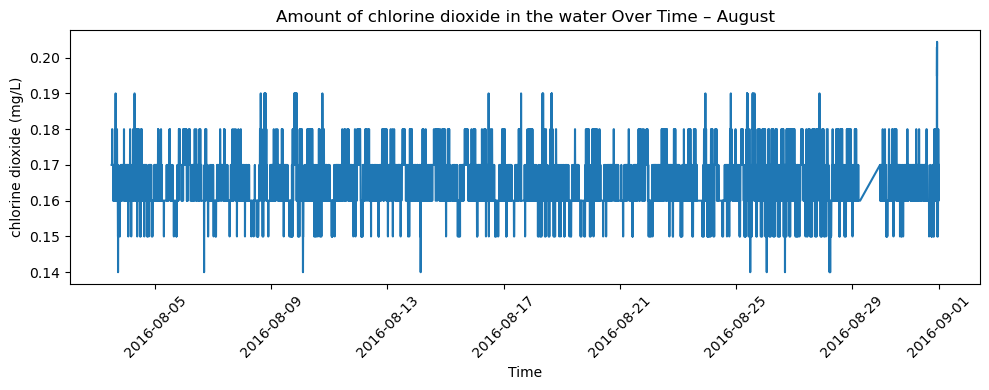

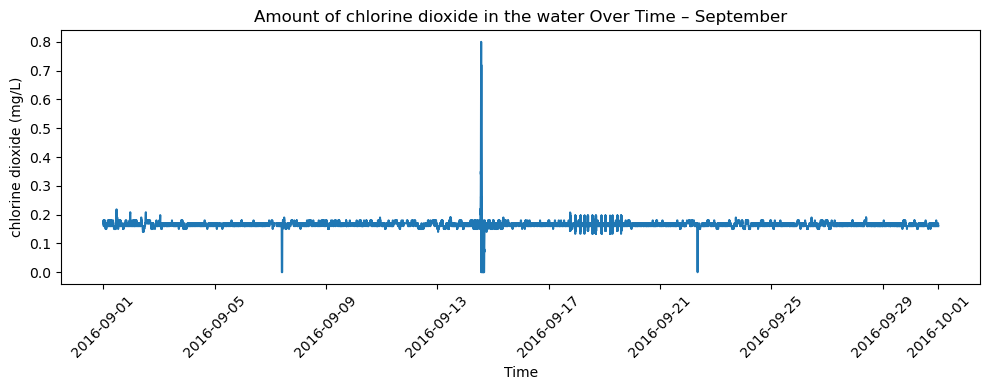

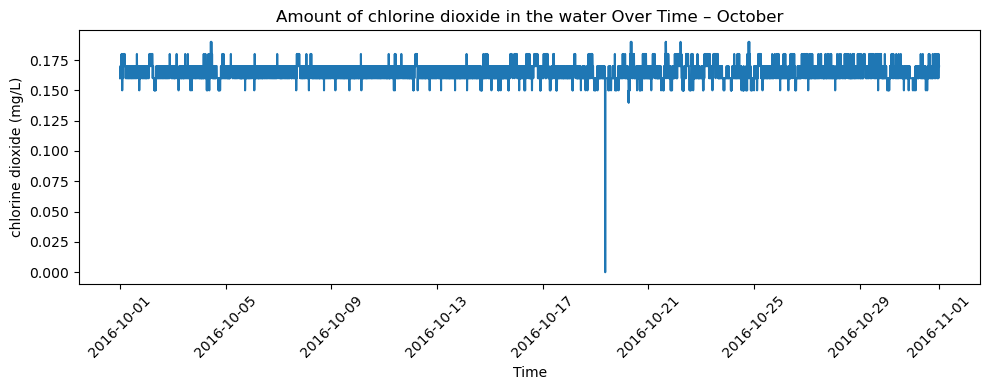

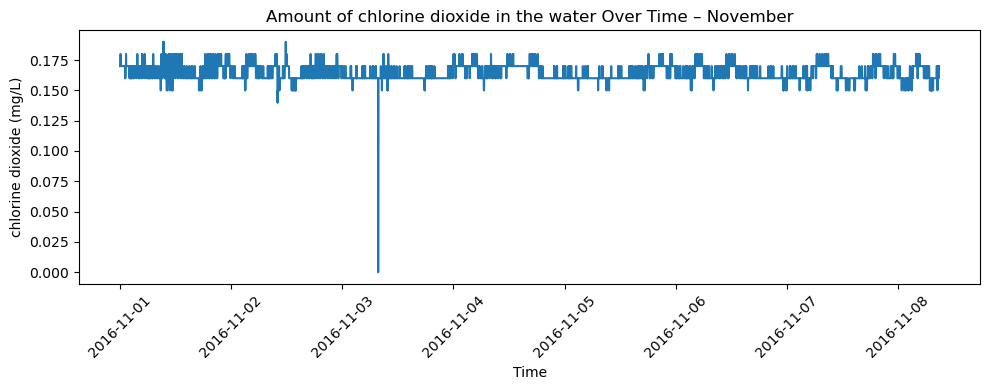

In [162]:
months = cleaned_water_quality_df['months'].unique()

for month in months:
    subset = cleaned_water_quality_df[cleaned_water_quality_df['months'] == month]
    plt.figure(figsize=(10, 4))
    plt.plot(subset['Time'], subset['Cl'])
    plt.title(f'Amount of chlorine dioxide in the water Over Time – {month}')
    plt.xlabel('Time')
    plt.ylabel('chlorine dioxide (mg/L)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

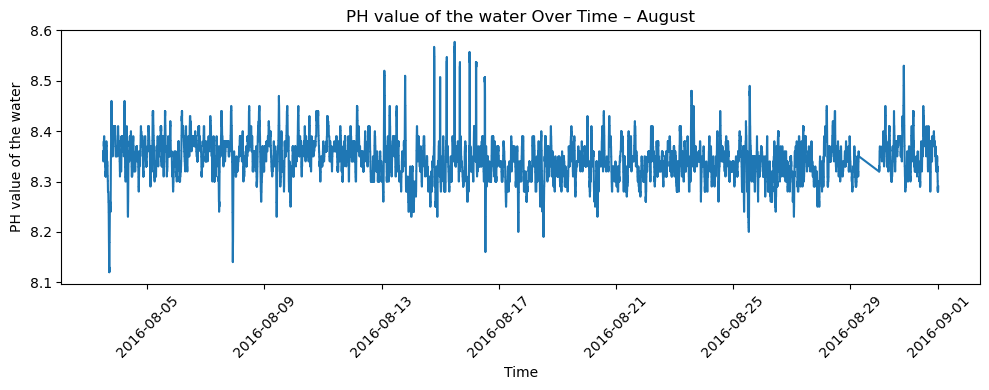

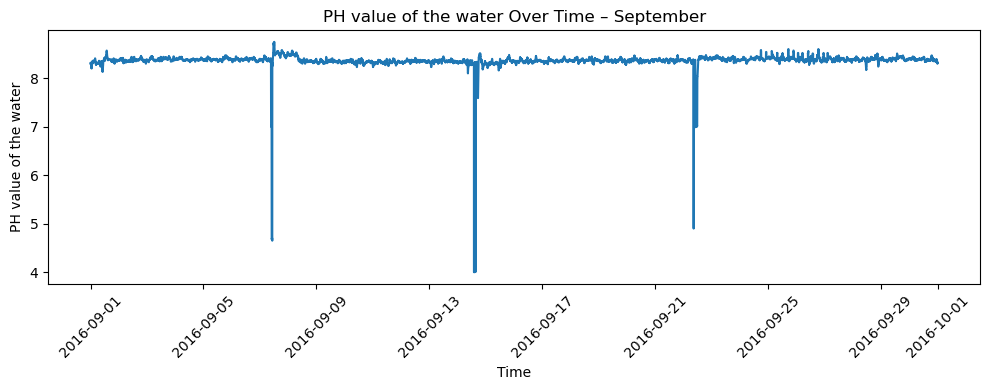

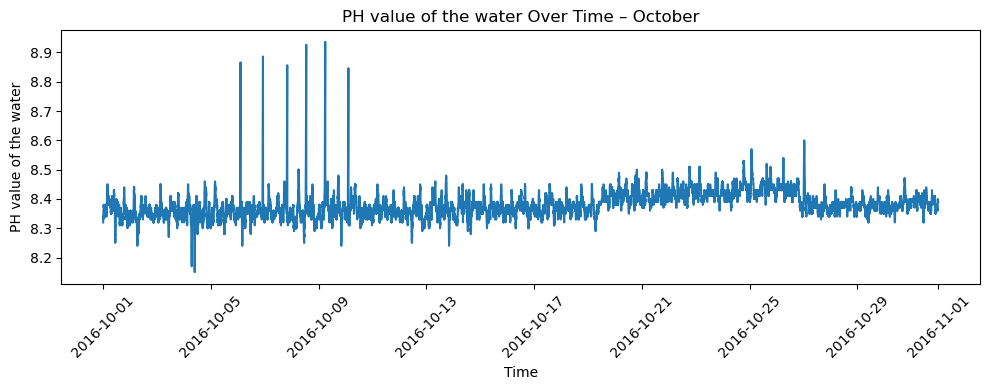

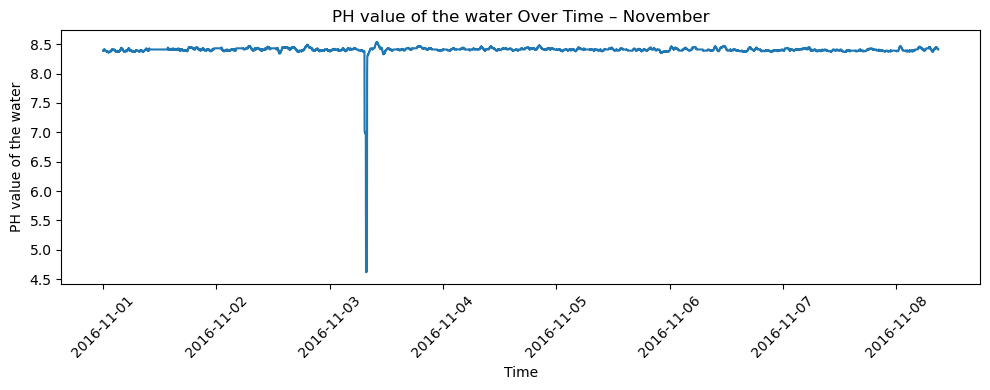

In [164]:
for month in months:
    subset = cleaned_water_quality_df[cleaned_water_quality_df['months'] == month]
    plt.figure(figsize=(10, 4))
    plt.plot(subset['Time'], subset['pH'])
    plt.title(f'PH value of the water Over Time – {month}')
    plt.xlabel('Time')
    plt.ylabel('PH value of the water')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

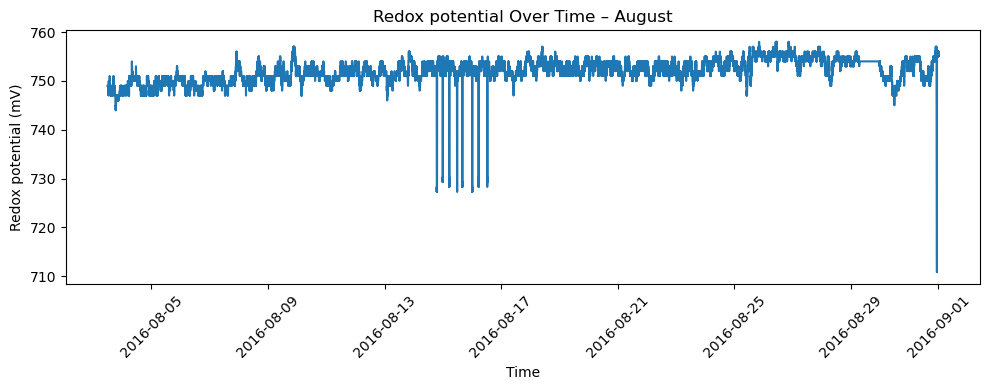

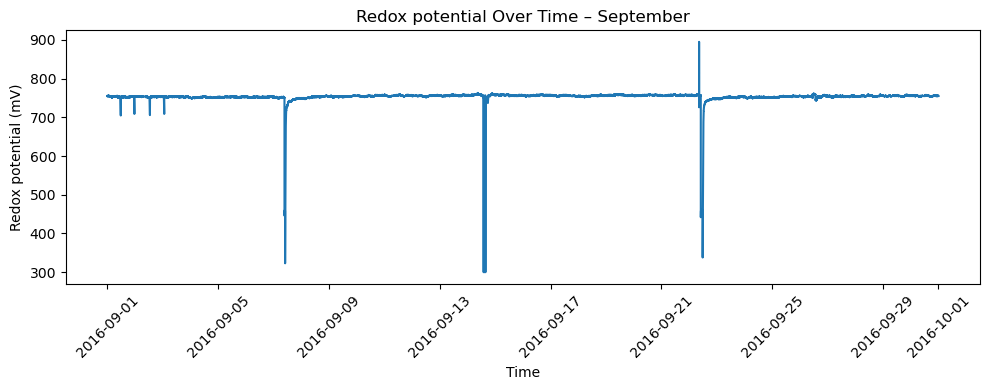

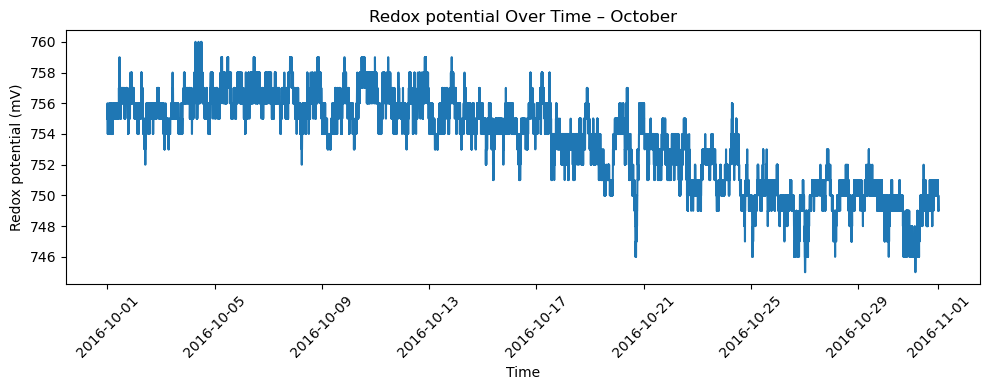

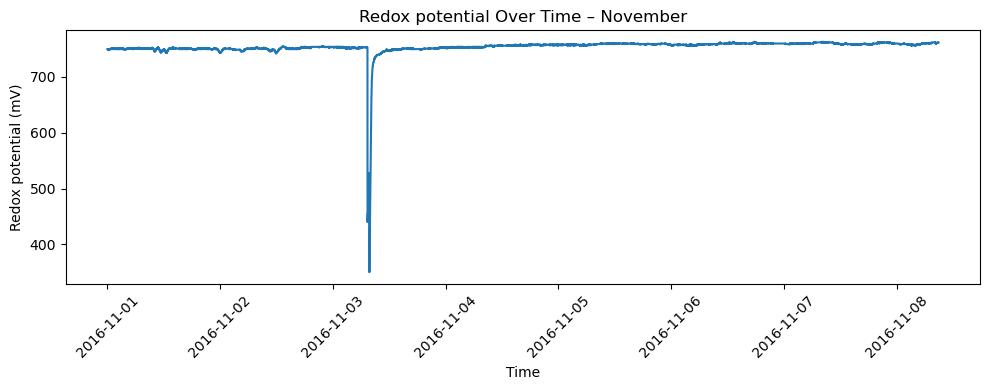

In [166]:
for month in months:
    subset = cleaned_water_quality_df[cleaned_water_quality_df['months'] == month]
    plt.figure(figsize=(10, 4))
    plt.plot(subset['Time'], subset['Redox'])
    plt.title(f'Redox potential Over Time – {month}')
    plt.xlabel('Time')
    plt.ylabel('Redox potential (mV)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

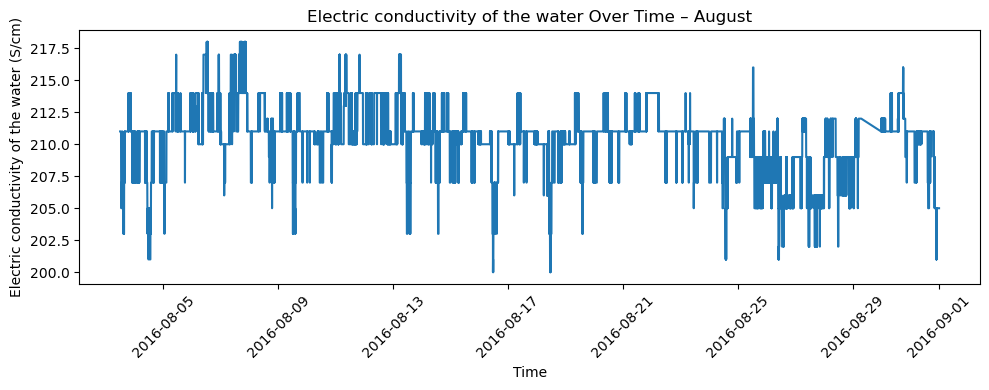

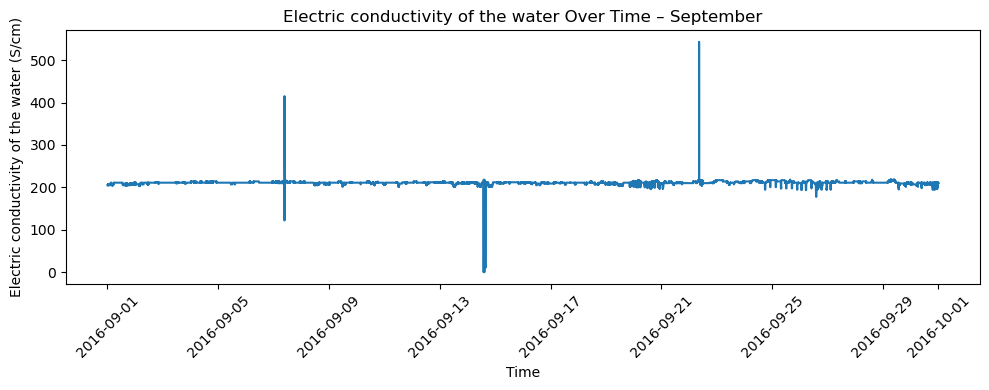

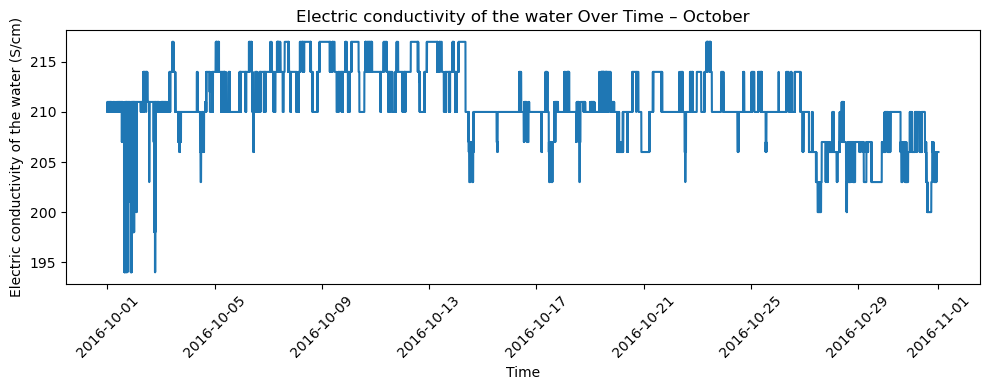

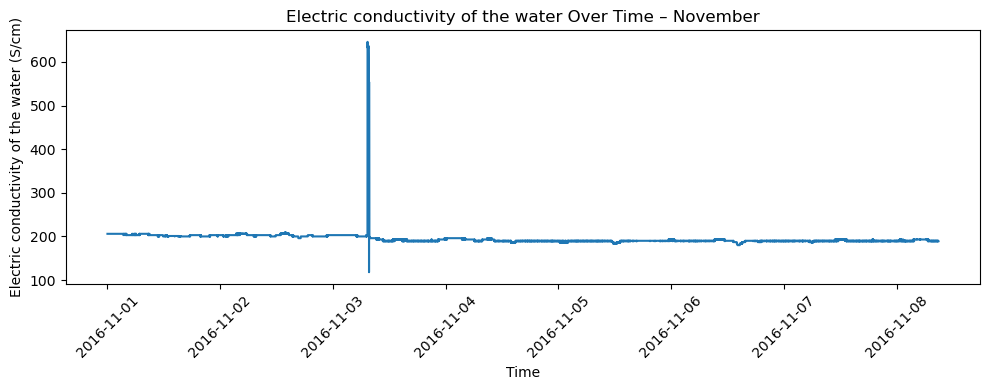

In [168]:
for month in months:
    subset = cleaned_water_quality_df[cleaned_water_quality_df['months'] == month]
    plt.figure(figsize=(10, 4))
    plt.plot(subset['Time'], subset['Leit'])
    plt.title(f'Electric conductivity of the water Over Time – {month}')
    plt.xlabel('Time')
    plt.ylabel('Electric conductivity of the water (S/cm)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

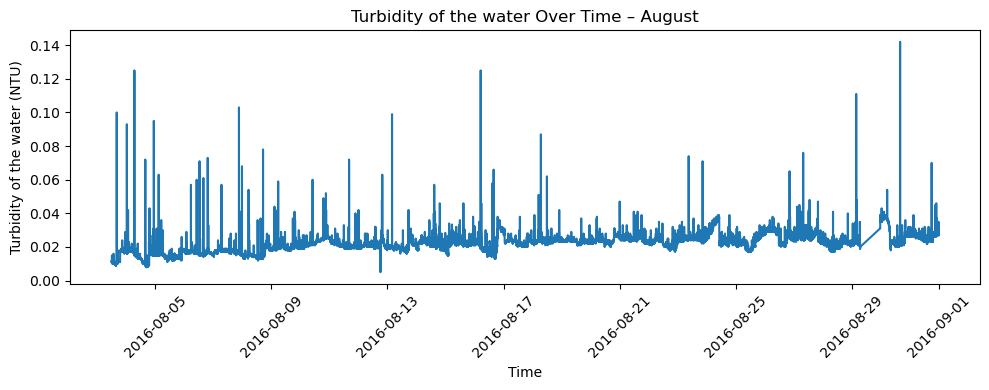

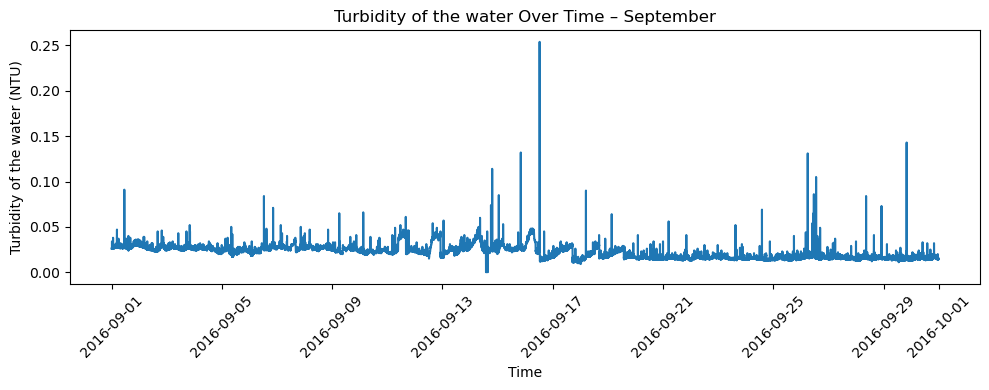

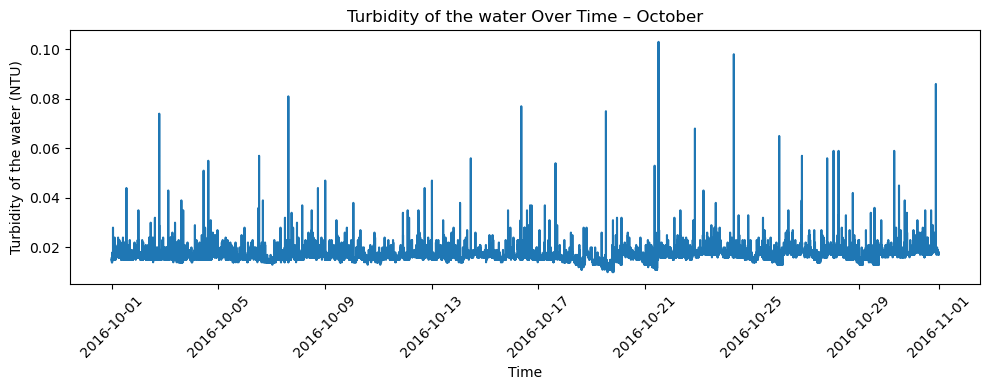

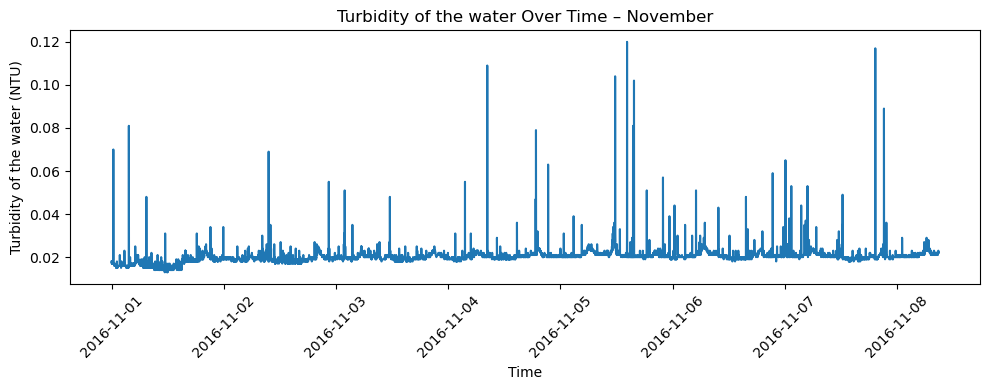

In [170]:
for month in months:
    subset = cleaned_water_quality_df[cleaned_water_quality_df['months'] == month]
    plt.figure(figsize=(10, 4))
    plt.plot(subset['Time'], subset['Trueb'])
    plt.title(f'Turbidity of the water Over Time – {month}')
    plt.xlabel('Time')
    plt.ylabel('Turbidity of the water (NTU)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

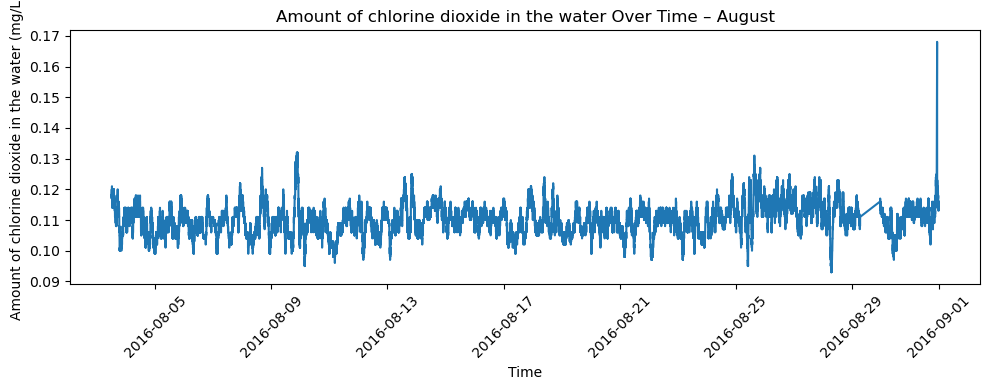

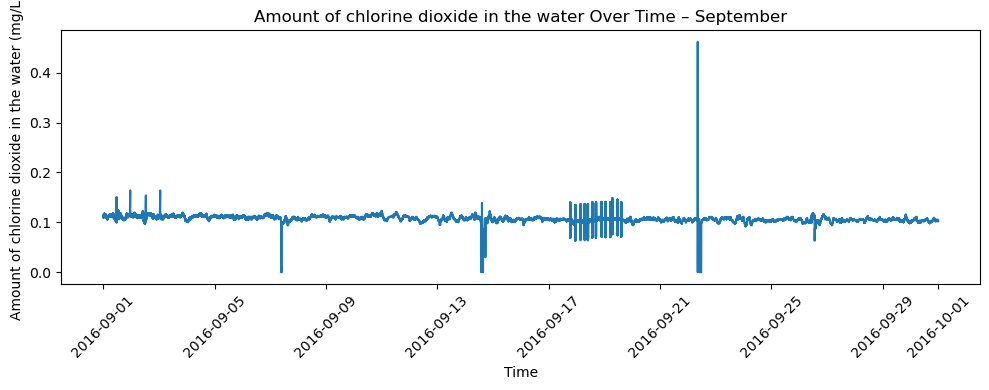

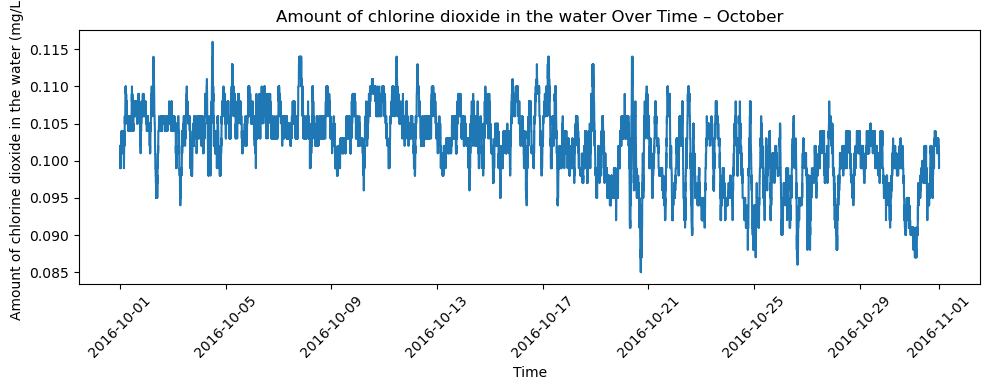

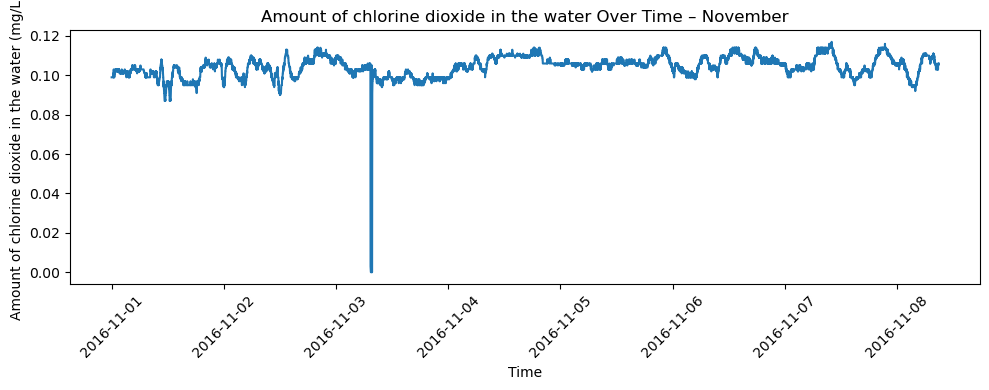

In [172]:
for month in months:
    subset = cleaned_water_quality_df[cleaned_water_quality_df['months'] == month]
    plt.figure(figsize=(10, 4))
    plt.plot(subset['Time'], subset['Cl_2'])
    plt.title(f'Amount of chlorine dioxide in the water Over Time – {month}')
    plt.xlabel('Time')
    plt.ylabel('Amount of chlorine dioxide in the water (mg/L)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    

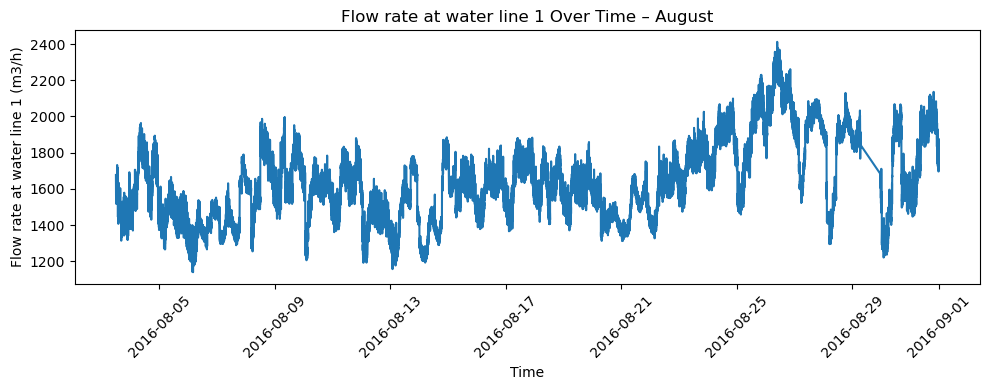

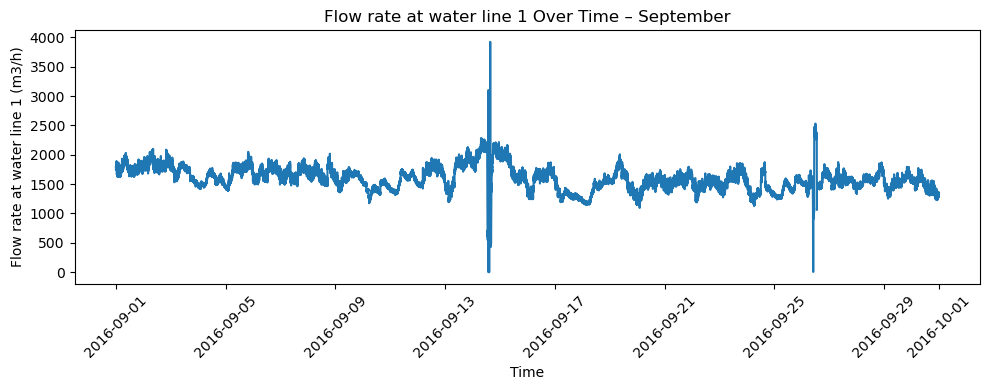

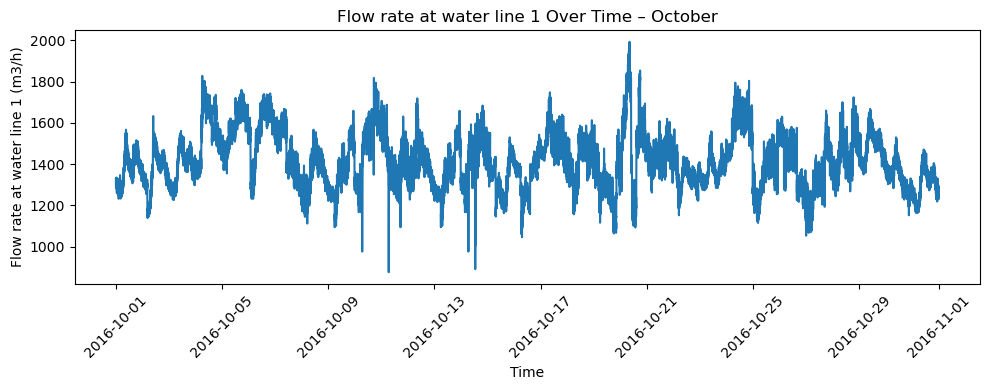

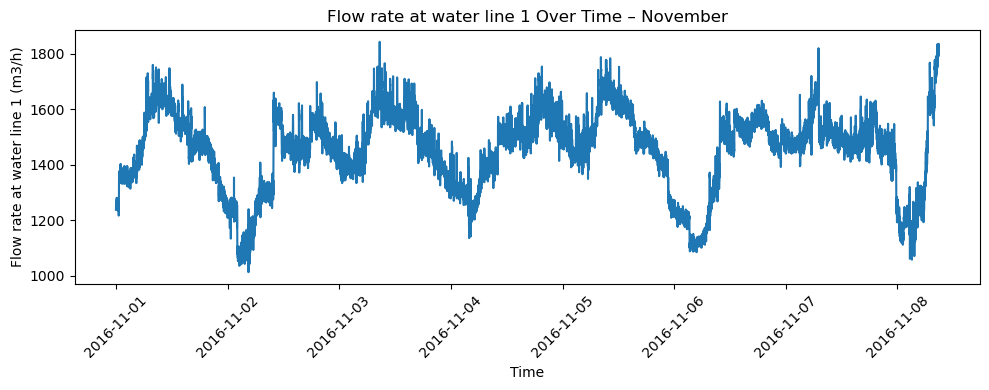

In [174]:
for month in months:
    subset = cleaned_water_quality_df[cleaned_water_quality_df['months'] == month]
    plt.figure(figsize=(10, 4))
    plt.plot(subset['Time'], subset['Fm'])
    plt.title(f'Flow rate at water line 1 Over Time – {month}')
    plt.xlabel('Time')
    plt.ylabel('Flow rate at water line 1 (m3/h)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

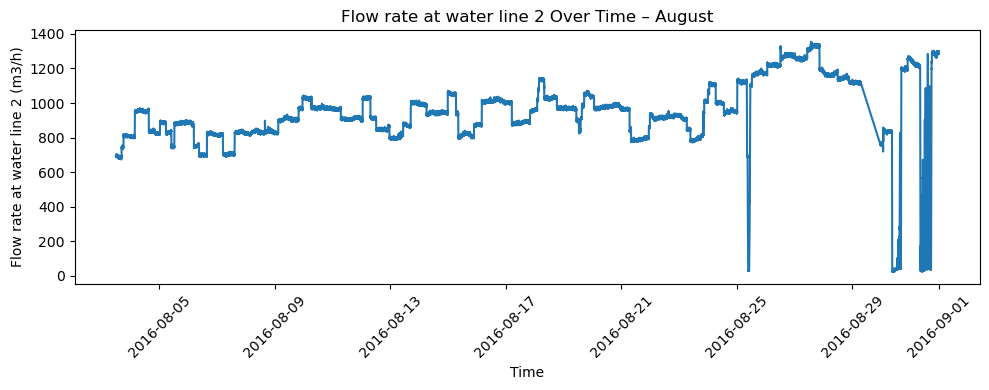

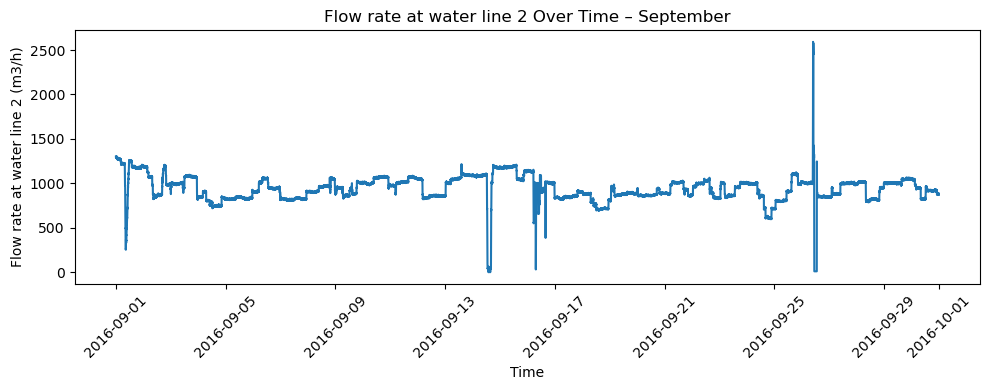

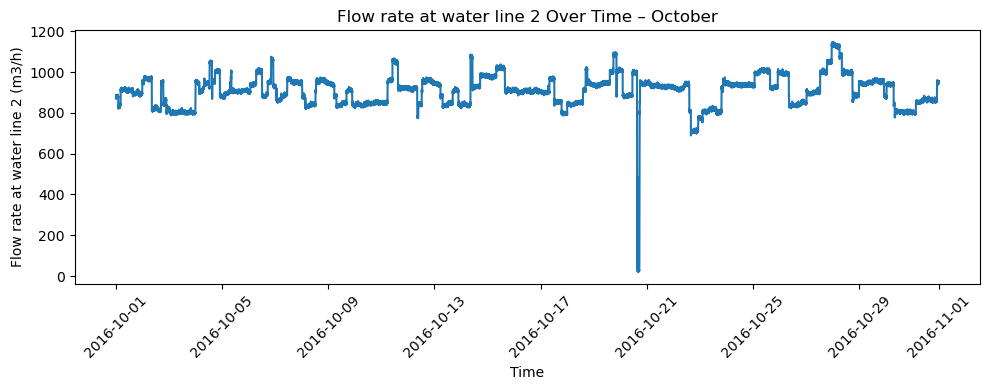

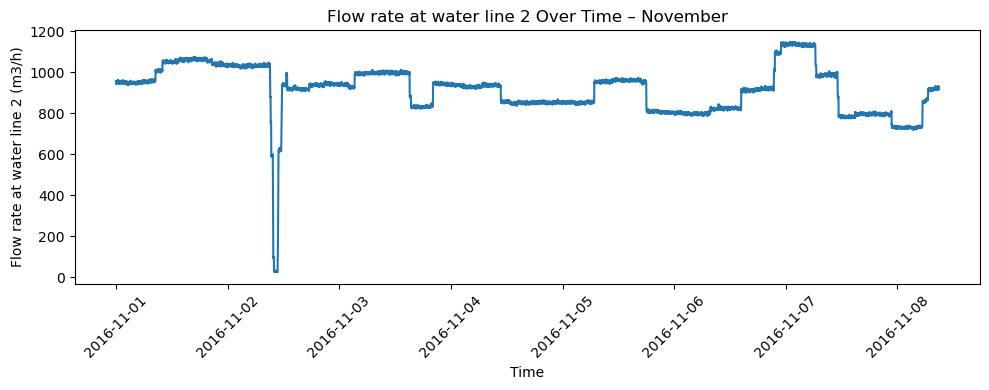

In [178]:
for month in months:
    subset = cleaned_water_quality_df[cleaned_water_quality_df['months'] == month]
    plt.figure(figsize=(10, 4))
    plt.plot(subset['Time'], subset['Fm_2'])
    plt.title(f'Flow rate at water line 2 Over Time – {month}')
    plt.xlabel('Time')
    plt.ylabel('Flow rate at water line 2 (m3/h)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

<Axes: xlabel='wqd'>

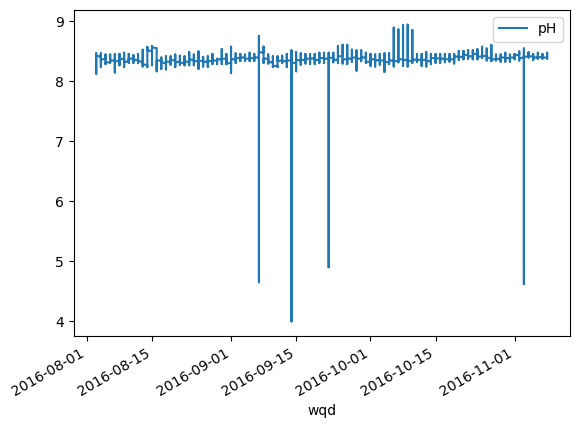

In [118]:
cleaned_water_quality_df.plot('wqd','pH')

<Axes: xlabel='wqd'>

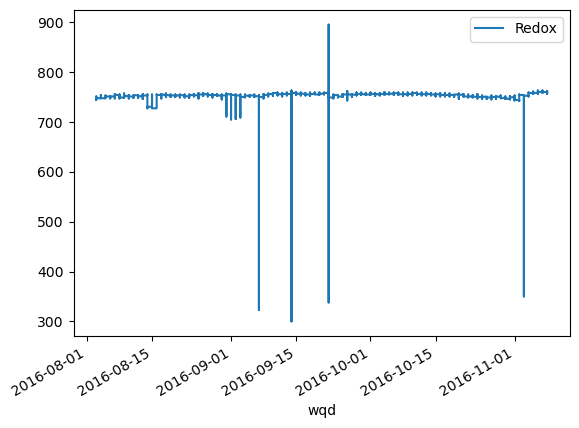

In [120]:
cleaned_water_quality_df.plot('wqd','Redox')

<Axes: xlabel='wqd'>

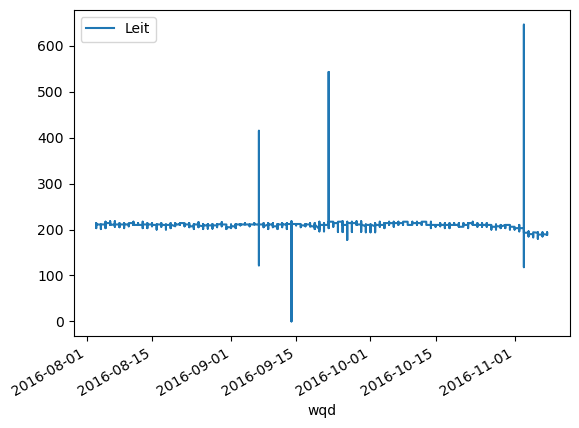

In [122]:
cleaned_water_quality_df.plot('wqd','Leit')

<Axes: xlabel='wqd'>

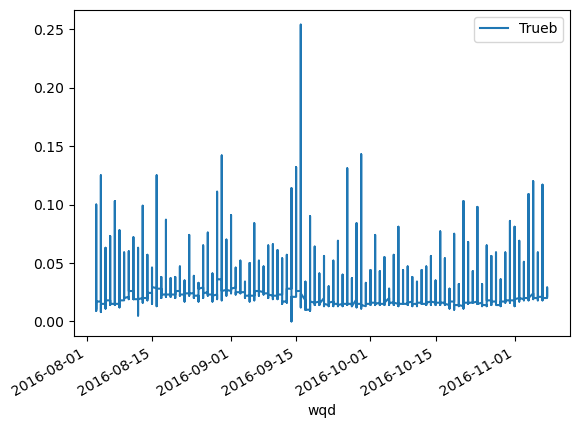

In [124]:
cleaned_water_quality_df.plot('wqd','Trueb')

<Axes: xlabel='wqd'>

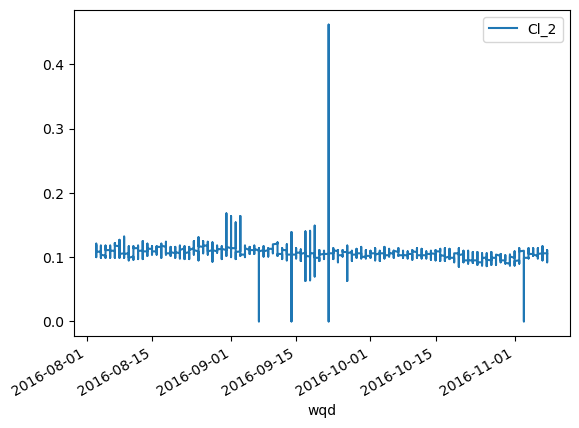

In [126]:
cleaned_water_quality_df.plot('wqd','Cl_2')

<Axes: xlabel='wqd'>

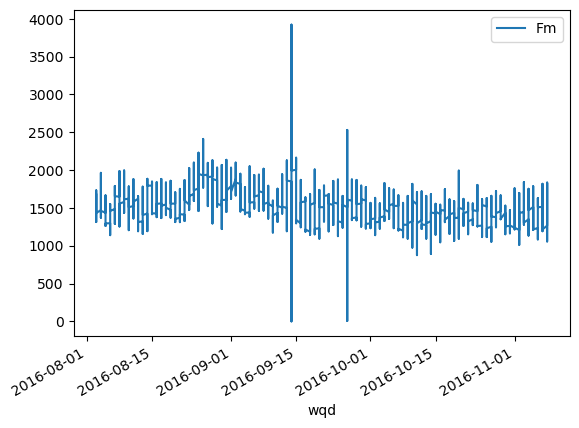

In [128]:
cleaned_water_quality_df.plot('wqd','Fm')

<Axes: xlabel='wqd'>

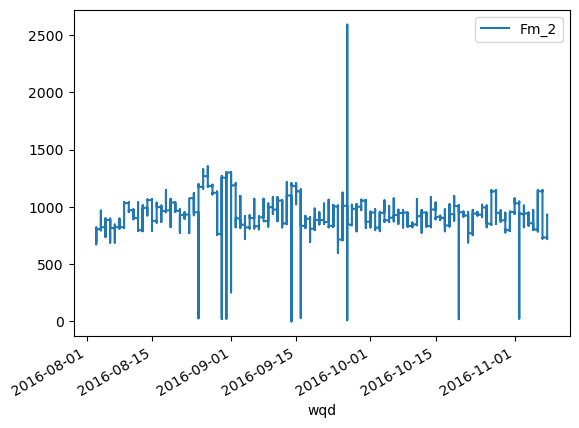

In [130]:
cleaned_water_quality_df.plot('wqd','Fm_2')

In [ ]:
cols_to_see = ['Tp', 'Cl', 'pH', 'Redox', 'Leit', 'Trueb', 'Cl_2', 'Fm', 'Fm_2']
cleaned_water_quality_df.groupby(['wqt'])[cols_to_see].max()

In [29]:
cols_to_see = ['Tp', 'Cl', 'pH', 'Redox', 'Leit', 'Trueb', 'Cl_2', 'Fm', 'Fm_2']
specific_time_df = cleaned_water_quality_df.groupby(['months','day_of_week','period'])[cols_to_see].mean()
specific_time_df

C:\Users\Zahraa\AppData\Local\Temp\ipykernel_28552\105368368.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  specific_time_df = cleaned_water_quality_df.groupby(['months','day_of_week','period'])[cols_to_see].mean()


Tp        Cl        pH       Redox  \
months   day_of_week period                                                 
August   Monday      Morning     6.954236  0.162607  8.350973  751.260035   
                     Noon        7.015556  0.165741  8.350074  751.525926   
                     Afternoon   7.038704  0.168759  8.342819  751.883434   
                     Night       7.069330  0.165019  8.334939  752.220545   
         Tuesday     Morning     7.042287  0.165956  8.347869  751.514029   
...                                   ...       ...       ...         ...   
November Saturday    Night      10.630758  0.165727  8.399682  758.306061   
         Sunday      Morning    10.450000  0.166048  8.418000  758.861905   
                     Noon       10.516667  0.167500  8.396111  760.650000   
                     Afternoon  10.491667  0.163722  8.398778  760.300000   
                     Night      10.417576  0.162227  8.404288  758.916667   

                                      Leit     Trueb      Cl_2           Fm  \
months   day_of_week period                                                   
August   Monday      Morning    211.665460  0.021157  0.108753  1591.154236   
                     Noon       211.368519  0.018998  0.109748  1705.407407   
                     Afternoon  210.498148  0.018884  0.114500  1697.174074   
                     Night      210.765443  0.020239  0.109781  1638.732181   
         Tuesday     Morning    210.518761  0.022726  0.109407  1676.851102   
...                                    ...       ...       ...          ...   
November Saturday    Night      189.501515  0.020867  0.107158  1428.884848   
         Sunday      Morning    190.957143  0.021869  0.106360  1317.400000   
                     Noon       186.383333  0.019322  0.111806  1523.444444   
                     Afternoon  189.100000  0.020483  0.108767  1540.138889   
                     Night      189.734848  0.020871  0.104859  1362.033333   

                                      Fm_2  
months   day_of_week period                 
August   Monday      Morning    901.957277  
                     Noon       856.875926  
                     Afternoon  860.664815  
                     Night      922.567171  
         Tuesday     Morning    814.029184  
...                                    ...  
November Saturday    Night      826.854545  
         Sunday      Morning    812.900000  
                     Noon       840.605556  
                     Afternoon  911.833333  
                     Night      907.524242  

[112 rows x 9 columns]

In [132]:
specific_time_df.describe()

,Tp,Cl,pH,Redox,Leit,Trueb,Cl_2,Fm,Fm_2
count,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000,112.000000
mean,8.906529,0.165031,8.372992,753.052076,206.470657,0.019690,0.105828,1533.780112,917.194179
std,1.388216,0.003040,0.031469,4.933172,7.935041,0.002515,0.004050,118.314623,71.505082
min,6.850417,0.144014,8.218048,712.835714,186.383333,0.014739,0.095655,1317.400000,692.472222
25%,7.856582,0.164223,8.354511,751.982927,208.066745,0.017166,0.102500,1440.094940,865.606220
50%,8.989296,0.165490,8.375673,753.607049,210.133788,0.020160,0.106425,1521.472222,925.510079
75%,9.948129,0.166521,8.390385,754.299432,211.163826,0.021350,0.109354,1623.677292,958.572538
max,10.998333,0.172208,8.425024,761.097619,216.197619,0.026548,0.114500,1759.540278,1078.614444


In [138]:
water_quality_df['EVENT'].value_counts()

EVENT
False    137840
True       1726
Name: count, dtype: int64

In [110]:
juan_test = cleaned_water_quality_df.groupby(['wqd','period'])[cols_to_see].max()

C:\Users\Zahraa\AppData\Local\Temp\ipykernel_28552\3059670433.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  juan_test = cleaned_water_quality_df.groupby(['wqd','period'])[cols_to_see].max()


<Axes: xlabel='wqd'>

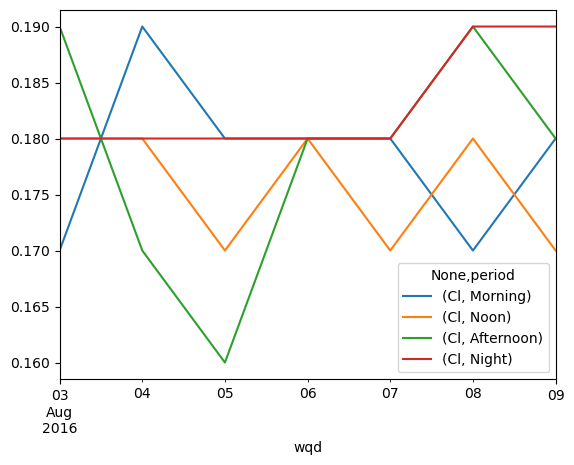

In [112]:
juan_test[['Cl']].unstack().reset_index().set_index(['wqd']).iloc[:7].plot()

### Tp:

##### The temperature of the water, given in °C.

###### lowest: 6.850416666666667 ('August', 'Thursday', 'Morning')
###### highest: 10.998333333333333 ('November', 'Thursday', 'Noon')

In [45]:
min_Tp= specific_time_df['Tp'].min()
when_min_Tp= specific_time_df['Tp'].idxmin()
print(min_Tp,when_min_Tp)

6.850416666666667 ('August', 'Thursday', 'Morning')


In [47]:
max_Tp= specific_time_df['Tp'].max()
when_max_Tp= specific_time_df['Tp'].idxmax()
print(max_Tp,when_max_Tp)

10.998333333333333 ('November', 'Thursday', 'Noon')


### Cl:

#####  Amount of chlorine dioxide in the water, given in mg/L (MS1).

###### lowest: 0.14401388888888889 ('September', 'Wednesday', 'Afternoon')
###### highest: 0.17220833333333335 ('September', 'Wednesday', 'Noon')

In [50]:
min_Cl= specific_time_df['Cl'].min()
when_min_Cl= specific_time_df['Cl'].idxmin()
print(min_Cl,when_min_Cl)

0.14401388888888889 ('September', 'Wednesday', 'Afternoon')


In [52]:
max_Cl= specific_time_df['Cl'].max()
when_max_Cl= specific_time_df['Cl'].idxmax()
print(max_Cl,when_max_Cl)

0.17220833333333335 ('September', 'Wednesday', 'Noon')


### pH:

#####  PH value of the water.

###### lowest: 8.218047619047619 ('November', 'Thursday', 'Morning')
###### highest: 8.42502380952381 ('November', 'Wednesday', 'Morning')

In [60]:
min_pH= specific_time_df['pH'].min()
when_min_pH= specific_time_df['pH'].idxmin()
print(min_pH,when_min_pH)

8.218047619047619 ('November', 'Thursday', 'Morning')


In [62]:
max_pH= specific_time_df['pH'].max()
when_max_pH= specific_time_df['pH'].idxmax()
print(max_pH,when_max_pH)

8.42502380952381 ('November', 'Wednesday', 'Morning')


### Redox:

#####  Redox potential, given in mV.

###### lowest: 712.8357142857143 ('November', 'Thursday', 'Morning')
###### highest: 761.097619047619 ('November', 'Monday', 'Morning')

In [39]:
#worest redox
min_Redox= specific_time_df['Redox'].min()
when_min_Redox= specific_time_df['Redox'].idxmin()
print(min_Redox,when_min_Redox)

712.8357142857143 ('November', 'Thursday', 'Morning')


In [41]:
#best redox
max_Redox= specific_time_df['Redox'].max()
when_max_Redox= specific_time_df['Redox'].idxmax()
print(max_Redox,when_max_Redox)

761.097619047619 ('November', 'Monday', 'Morning')


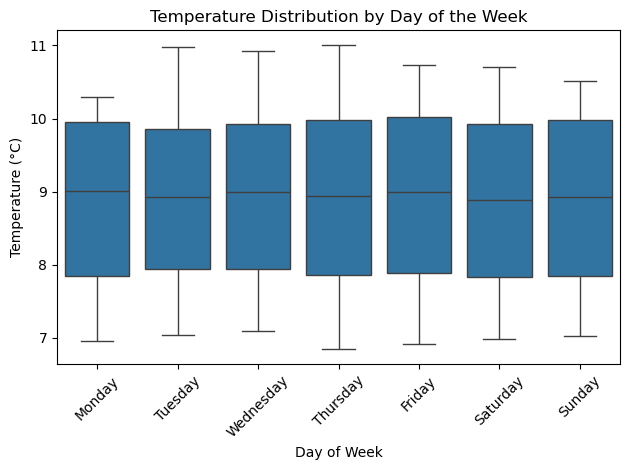

In [31]:
 import seaborn as sns
import matplotlib.pyplot as plt

plt.figure 
sns.boxplot(data=specific_time_df, x='day_of_week', y='Tp')
plt.title('Temperature Distribution by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [180]:
cleaned_water_quality_df.to_csv("water_quality_cleaned.csv")

In [184]:
specific_time_df.to_csv("specific_time_water_quality.csv")